# 相关设置

In [12]:
from IPython.core.interactiveshell import InteractiveShell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

# 数据读取

In [13]:
train_data = pd.read_csv('data/train_data.csv').values
print(train_data.shape)

(10886, 13)


# 划分数据集

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=412)

print(train_set.shape)
print(test_set.shape)

(8708, 13)
(2178, 13)


In [15]:
X = train_set[:, 0:12]
y = train_set[:, -1]
X_test = test_set[:, 0:12]
y_test = test_set[:, -1]

# 评估方法

In [16]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=X, y=y)

y_predict = lr.predict(X=X_test)

LinearRegression()

In [18]:
print(y_test)
print(y_predict)

[ 78. 204. 196. ... 140.  81. 193.]
[ 54.46244406 229.59295059 244.04289555 ... -31.49378954  12.99099878
 233.00006989]


In [19]:
print('Variance: ', explained_variance_score(y_test, y_predict))
print('MAE: ', mean_absolute_error(y_test, y_predict))
print('MSE: ', mean_squared_error(y_test, y_predict))
print('R-squared: ', r2_score(y_test, y_predict))

Variance:  0.40518055209856474
MAE:  104.58244955028428
MSE:  19271.876392064205
R-squared:  0.4051448411419031


# Ridge Regression

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring='r2')

{'alpha': 30, 'max_iter': 3000}
R-squared:  0.4051351774748885


<AxesSubplot:xlabel='alpha', ylabel='r2'>

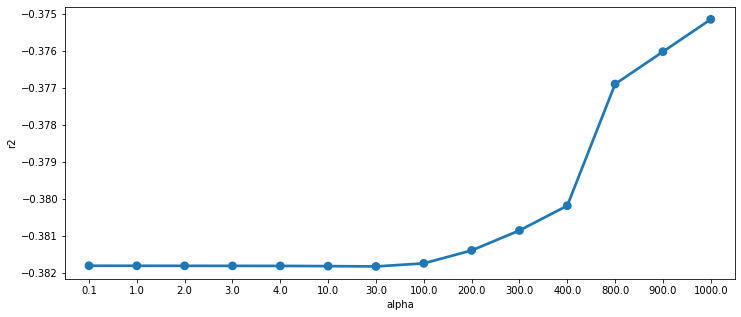

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()
ridge_params_ = {'max_iter': [3000], 'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

grid_ridge_m = GridSearchCV(ridge_model, ridge_params_, scoring='r2', cv=5)
grid_ridge_m.fit(X, y)

y_predict = grid_ridge_m.predict(X=X_test)
print(grid_ridge_m.best_params_)
print("R-squared: ", r2_score(y_test, y_predict))

fig, ax= plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x: x["alpha"])
df["r2"] = df["mean_test_score"].apply(lambda x: -x)
sns.pointplot(data=df, x="alpha", y="r2", ax=ax)

# Lasso Regression

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e+01, 1.00000000e+00, 5.00000000e-01, 3.33333333e-01,
       2.50000000e-01, 1.00000000e-01, 3.33333333e-02, 1.00000000e-02,
       5.00000000e-03, 3.33333333e-03, 2.50000000e-03, 1.25000000e-03,
       1.11111111e-03, 1.00000000e-03]),
                         'max_iter': [3000]},
             scoring='r2')

{'alpha': 0.03333333333333333, 'max_iter': 3000}
R-squared:  0.40514331746586896


<AxesSubplot:xlabel='alpha', ylabel='r2'>

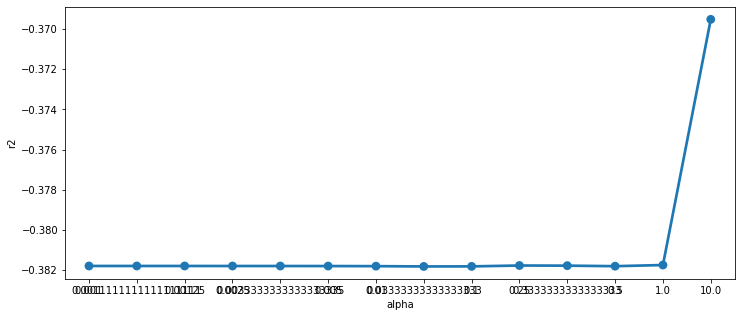

In [21]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

alpha  = 1 / np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params_ = {'max_iter': [3000], 'alpha': alpha}

lasso_model = GridSearchCV(lasso_model, lasso_params_, scoring='r2', cv=5)
lasso_model.fit(X, y)

y_predict = lasso_model.predict(X=X_test)
print(lasso_model.best_params_)
print ("R-squared: ", r2_score(y_test, y_predict))

fig, ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(lasso_model.cv_results_)
df["alpha"] = df["params"].apply(lambda x: x["alpha"])
df["r2"] = df["mean_test_score"].apply(lambda x: -x)
sns.pointplot(data=df, x="alpha", y="r2", ax=ax)

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

y_predict = rf_model.predict(X=X_test)
print ("R-squared: ", r2_score(y_test, y_predict))

RandomForestRegressor()

R-squared:  0.9529584443428737


# Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=4000, alpha=0.01)

gbr_model.fit(X, y)
y_predict = gbr_model.predict(X=X_test)
print ("R-squared: ", r2_score(y_test, y_predict))

GradientBoostingRegressor(alpha=0.01, n_estimators=4000)

R-squared:  0.9399226464735085
